1.Making Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Reading the dataset into dataframe

3.Research Q1:Factors influencing the potential of a player

In [73]:
df=pd.read_csv("C:\\Users\\sahit\\OneDrive\\Documents\\Courses-1Sem\\AIT580\\Assignments\\Final Project\\ResearchData.csv")

In [3]:
df.head()

,Unnamed: 0,full_name,height_cm,weight_kgs,body_type,potential,skill,wage_euro
0,1,Kalidou Koulibaly,187.96,88.9,Normal,91,2,135000.0
1,2,Manuel Neuer,193.04,92.1,Normal,89,1,130000.0
2,3,Sergio Busquets i Burgos,187.96,76.2,Lean,89,3,315000.0
3,4,Thibaut Courtois,198.12,96.2,Courtois,90,1,240000.0
4,5,Marc-André ter Stegen,187.96,84.8,Normal,92,1,240000.0


In [4]:
#Dropping unnecessary columns
df=df.drop(['Unnamed: 0'], axis=1)

In [5]:
#Univariate Analysis
df.describe()

,height_cm,weight_kgs,potential,skill,wage_euro
count,17798.000000,17798.000000,17798.000000,17798.000000,17552.000000
mean,174.942036,75.288802,71.320991,2.353130,9034.525980
std,14.026453,7.070165,6.020554,0.757335,17751.057875
min,152.400000,49.900000,48.000000,1.000000,1000.000000
25%,154.940000,69.900000,67.000000,2.000000,1000.000000
50%,175.260000,74.800000,71.000000,2.000000,3000.000000
75%,185.420000,79.800000,75.000000,3.000000,9000.000000
max,205.740000,110.200000,94.000000,5.000000,420000.000000


In [6]:
#Since the research question is about the potential of the player, trying to grasp the unique values of potential
df['potential'].unique()

array([91, 89, 90, 92, 93, 87, 88, 86, 85, 83, 84, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 48, 51, 50, 94], dtype=int64)

Potential is an interval data type where highest value of potential means the player has high potential. However, it doesnot have a true zero.

In [9]:
potential_values=pd.DataFrame(df['potential'].value_counts()).reset_index()
potential_values.columns=['potential','value_counts']
potential_values

,potential,value_counts
0,70,1229
1,71,1163
2,69,1130
3,72,1127
4,68,1107
5,73,1083
6,74,1026
7,67,1025
8,66,923
9,75,892


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

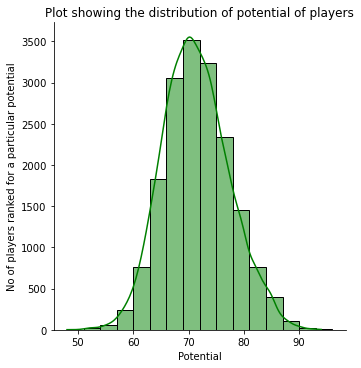

In [13]:
fig = plt.figure()
plt.figure(figsize=(10,10))
sns.displot(df, x="potential", binwidth=3,kde=True, color='g')
#plt.bar(potential_values['potential'],potential_values['value_counts'])
plt.title('Plot showing the distribution of potential of players')
plt.xlabel('Potential')
plt.ylabel('No of players ranked for a particular potential')
plt.show()

The above plot shows that the the variable potential is uniformly distributed with maximum number of players ranked around 70.

In [14]:
df['body_type'].value_counts()

Normal       10309
Lean          6415
Stocky        1072
Courtois         1
Akinfenwa        1
Name: body_type, dtype: int64

In [74]:
replacement_mapping_dict = {
    "Messi": "Normal",
    "Courtois": "Normal",
    "PLAYER_BODY_TYPE_25":"Normal",
    "Akinfenwa":"Normal",
    "Shaqiri":"Normal",
    "Neymar":"Normal",
    "C. Ronaldo":"Normal"
}
df.loc[:,'body_type']=df["body_type"].replace(replacement_mapping_dict,regex=True)


In [75]:
df['body_type'].value_counts()

Normal    10311
Lean       6415
Stocky     1072
Name: body_type, dtype: int64

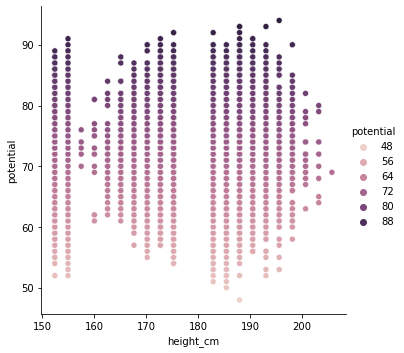

In [20]:
sns.relplot(x="height_cm", y="potential", hue="potential", data=df);

Text(0, 0.5, 'Potential')

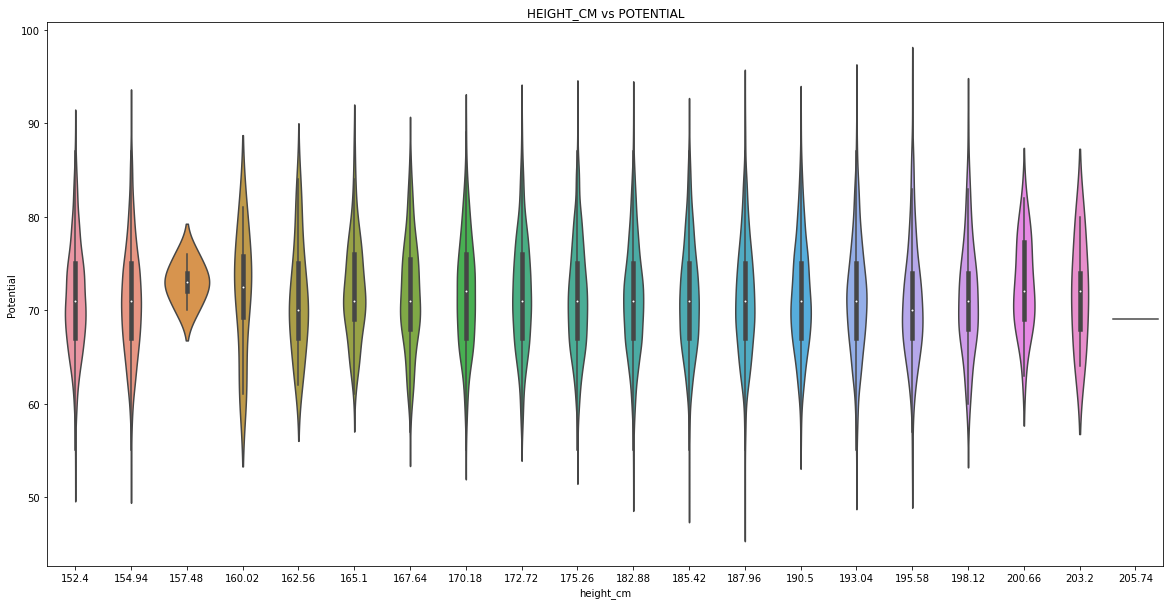

In [29]:
plt.figure(figsize=(20,10))
sns.violinplot(x="height_cm", y="potential", data=df)
plt.title('HEIGHT_CM vs POTENTIAL')
plt.xlabel('height_cm')
plt.ylabel('Potential')

Text(28.735468750000003, 0.5, 'Potential')

<Figure size 1440x1440 with 0 Axes>

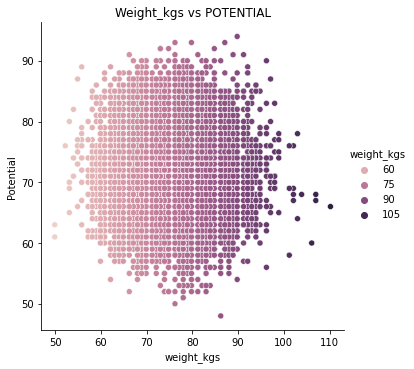

In [35]:
plt.figure(figsize=(20,20))
sns.relplot(x="weight_kgs", y="potential",hue='weight_kgs', data=df)
plt.title('Weight_kgs vs POTENTIAL')
plt.xlabel('weight_kgs')
plt.ylabel('Potential')

Text(10.049999999999997, 0.5, 'Potential')

<Figure size 1440x720 with 0 Axes>

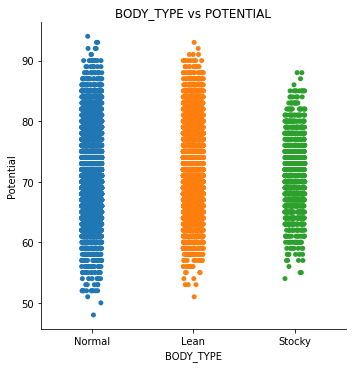

In [40]:
plt.figure(figsize=(20,10))
sns.catplot(x="body_type", y="potential", data=df)
plt.title('BODY_TYPE vs POTENTIAL')
plt.xlabel('BODY_TYPE')
plt.ylabel('Potential')

<Figure size 432x288 with 0 Axes>

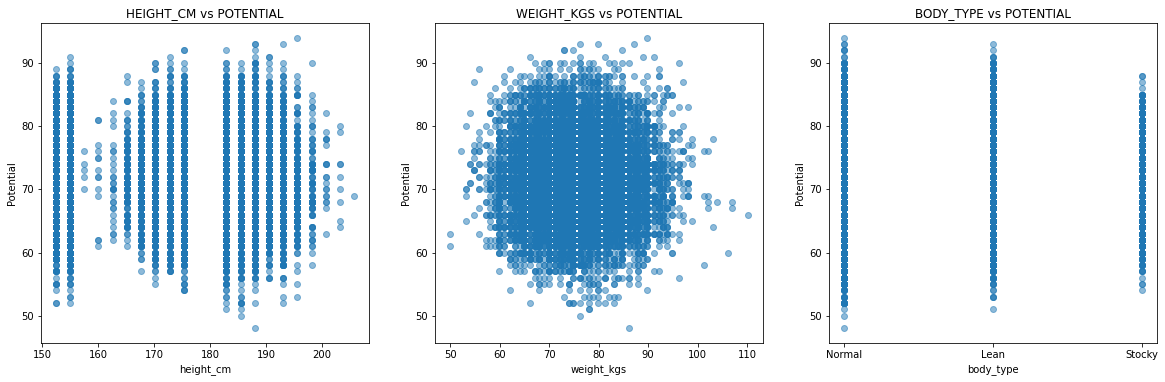

In [19]:
fig = plt.figure()
plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
sns.relplot(x="height_cm", y="potential", hue="potential", data=df);
plt.scatter(df['height_cm'], df['potential'], alpha=0.5)
plt.title('HEIGHT_CM vs POTENTIAL')
plt.xlabel('height_cm')
plt.ylabel('Potential')
plt.subplot(3, 3, 2)
plt.scatter(df['weight_kgs'], df['potential'], alpha=0.5)
plt.title('WEIGHT_KGS vs POTENTIAL')
plt.xlabel('weight_kgs')
plt.ylabel('Potential')
plt.subplot(3, 3, 3)
plt.scatter(df['body_type'], df['potential'], alpha=0.5)
plt.title('BODY_TYPE vs POTENTIAL')
plt.xlabel('body_type')
plt.ylabel('Potential')
plt.show()

From the above we can observe that some of the body type values are different.Replacing the values with the mode values.

In [72]:
df['body_type'].value_counts()

10311    1
6415     1
1072     1
Name: body_type, dtype: int64

In [55]:
skill_values=pd.DataFrame(df['skill'].value_counts()).reset_index()
skill_values.columns=['skill','value_counts']

In [56]:
skill_values.head()

,skill,value_counts
0,2,8348
1,3,6461
2,1,2065
3,4,883
4,5,41


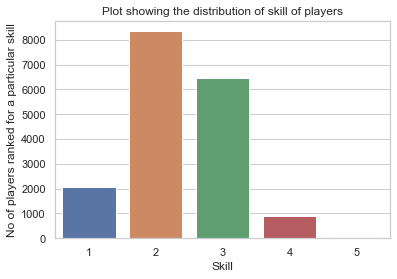

In [64]:
#colors = np.array(['b']*len(dfstacked))
#sns.catplot(x="skill", y="value_counts", hue="value_counts", kind="box", data=skill_values)
#sns.bar(skill_values['skill'],skill_values['value_counts'],hue)
sns.barplot(x="skill", y="value_counts", data=skill_values)
plt.title('Plot showing the distribution of skill of players')
plt.xlabel('Skill')
plt.ylabel('No of players ranked for a particular skill')
#plt.legend(labels=[loc=2, bbox_to_anchor = (1,1))
plt.show()

In [76]:
top_players_bodyType=pd.DataFrame(df['body_type'].value_counts()).reset_index()
top_players_bodyType.columns=['body_type','value_counts']
top_players_bodyType

,body_type,value_counts
0,Normal,10311
1,Lean,6415
2,Stocky,1072


<Figure size 432x288 with 0 Axes>

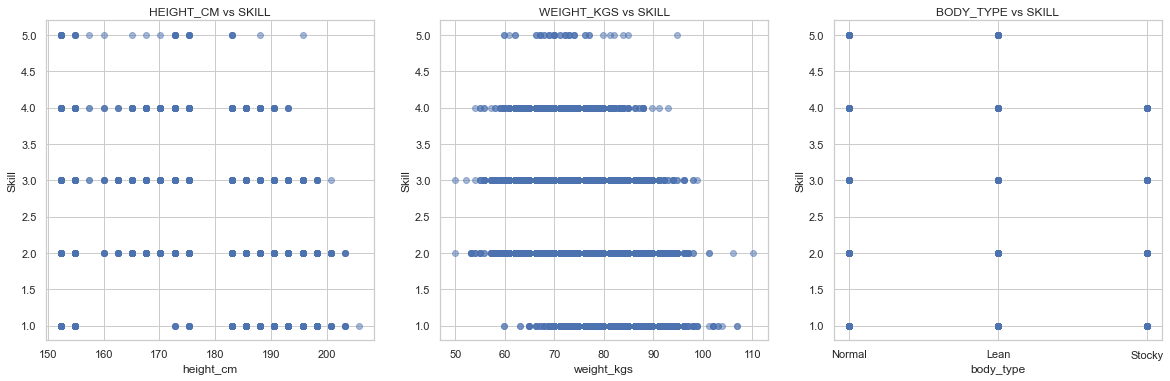

In [87]:
#Verifying the effect of age on height_cm potential
fig = plt.figure()
plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.scatter(df['height_cm'], df['skill'], alpha=0.5)
plt.title('HEIGHT_CM vs SKILL')
plt.xlabel('height_cm')
plt.ylabel('Skill')
plt.subplot(3, 3, 2)
plt.scatter(df['weight_kgs'], df['skill'], alpha=0.5)
plt.title('WEIGHT_KGS vs SKILL')
plt.xlabel('weight_kgs')
plt.ylabel('Skill')
plt.subplot(3, 3, 3)
plt.scatter(df['body_type'], df['skill'], alpha=0.5)
plt.title('BODY_TYPE vs SKILL')
plt.xlabel('body_type')
plt.ylabel('Skill')
plt.show()

In [90]:
df.head()

,Unnamed: 0,full_name,height_cm,weight_kgs,body_type,potential,skill,wage_euro
0,1,Kalidou Koulibaly,187.96,88.9,Normal,91,2,135000.0
1,2,Manuel Neuer,193.04,92.1,Normal,89,1,130000.0
2,3,Sergio Busquets i Burgos,187.96,76.2,Lean,89,3,315000.0
3,4,Thibaut Courtois,198.12,96.2,Normal,90,1,240000.0
4,5,Marc-André ter Stegen,187.96,84.8,Normal,92,1,240000.0


In [91]:
#Checking the distribution of the variable wage
df['wage_euro'].describe()

count     17552.000000
mean       9034.525980
std       17751.057875
min        1000.000000
25%        1000.000000
50%        3000.000000
75%        9000.000000
max      420000.000000
Name: wage_euro, dtype: float64

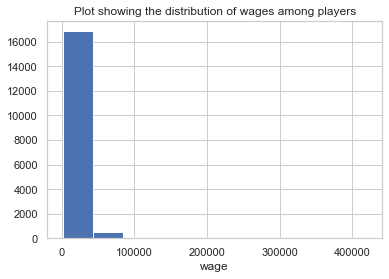

In [93]:
#Univariate analysis of wage
plt.hist(df['wage_euro'])
plt.title('Plot showing the distribution of wages among players')
plt.xlabel('wage')
#plt.ylabel('No of players ranked for a particular potential')
plt.show()

C:\Users\sahit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wage_euro', ylabel='Density'>

<Figure size 432x288 with 0 Axes>

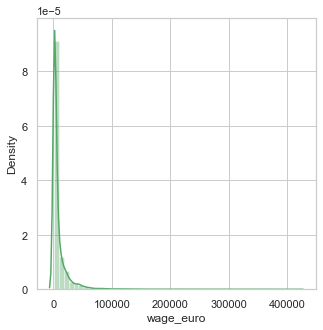

In [95]:
#Univariate analysis of wage
fig = plt.figure()
plt.figure(figsize=(5,5))
sns.distplot(df.wage_euro,kde=True,color='g')

C:\Users\sahit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wage_euro'>

<Figure size 432x288 with 0 Axes>

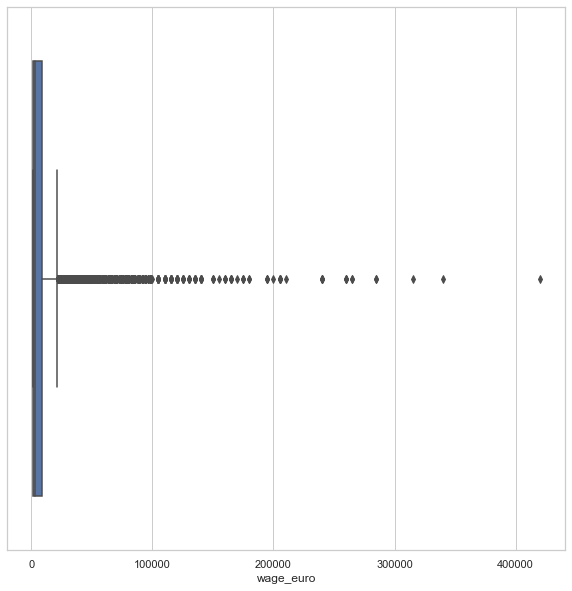

In [97]:
fig = plt.figure()
plt.figure(figsize=(10,10))
sns.boxplot(df.wage_euro)

In [98]:
df.head()

,Unnamed: 0,full_name,height_cm,weight_kgs,body_type,potential,skill,wage_euro
0,1,Kalidou Koulibaly,187.96,88.9,Normal,91,2,135000.0
1,2,Manuel Neuer,193.04,92.1,Normal,89,1,130000.0
2,3,Sergio Busquets i Burgos,187.96,76.2,Lean,89,3,315000.0
3,4,Thibaut Courtois,198.12,96.2,Normal,90,1,240000.0
4,5,Marc-André ter Stegen,187.96,84.8,Normal,92,1,240000.0


<Figure size 432x288 with 0 Axes>

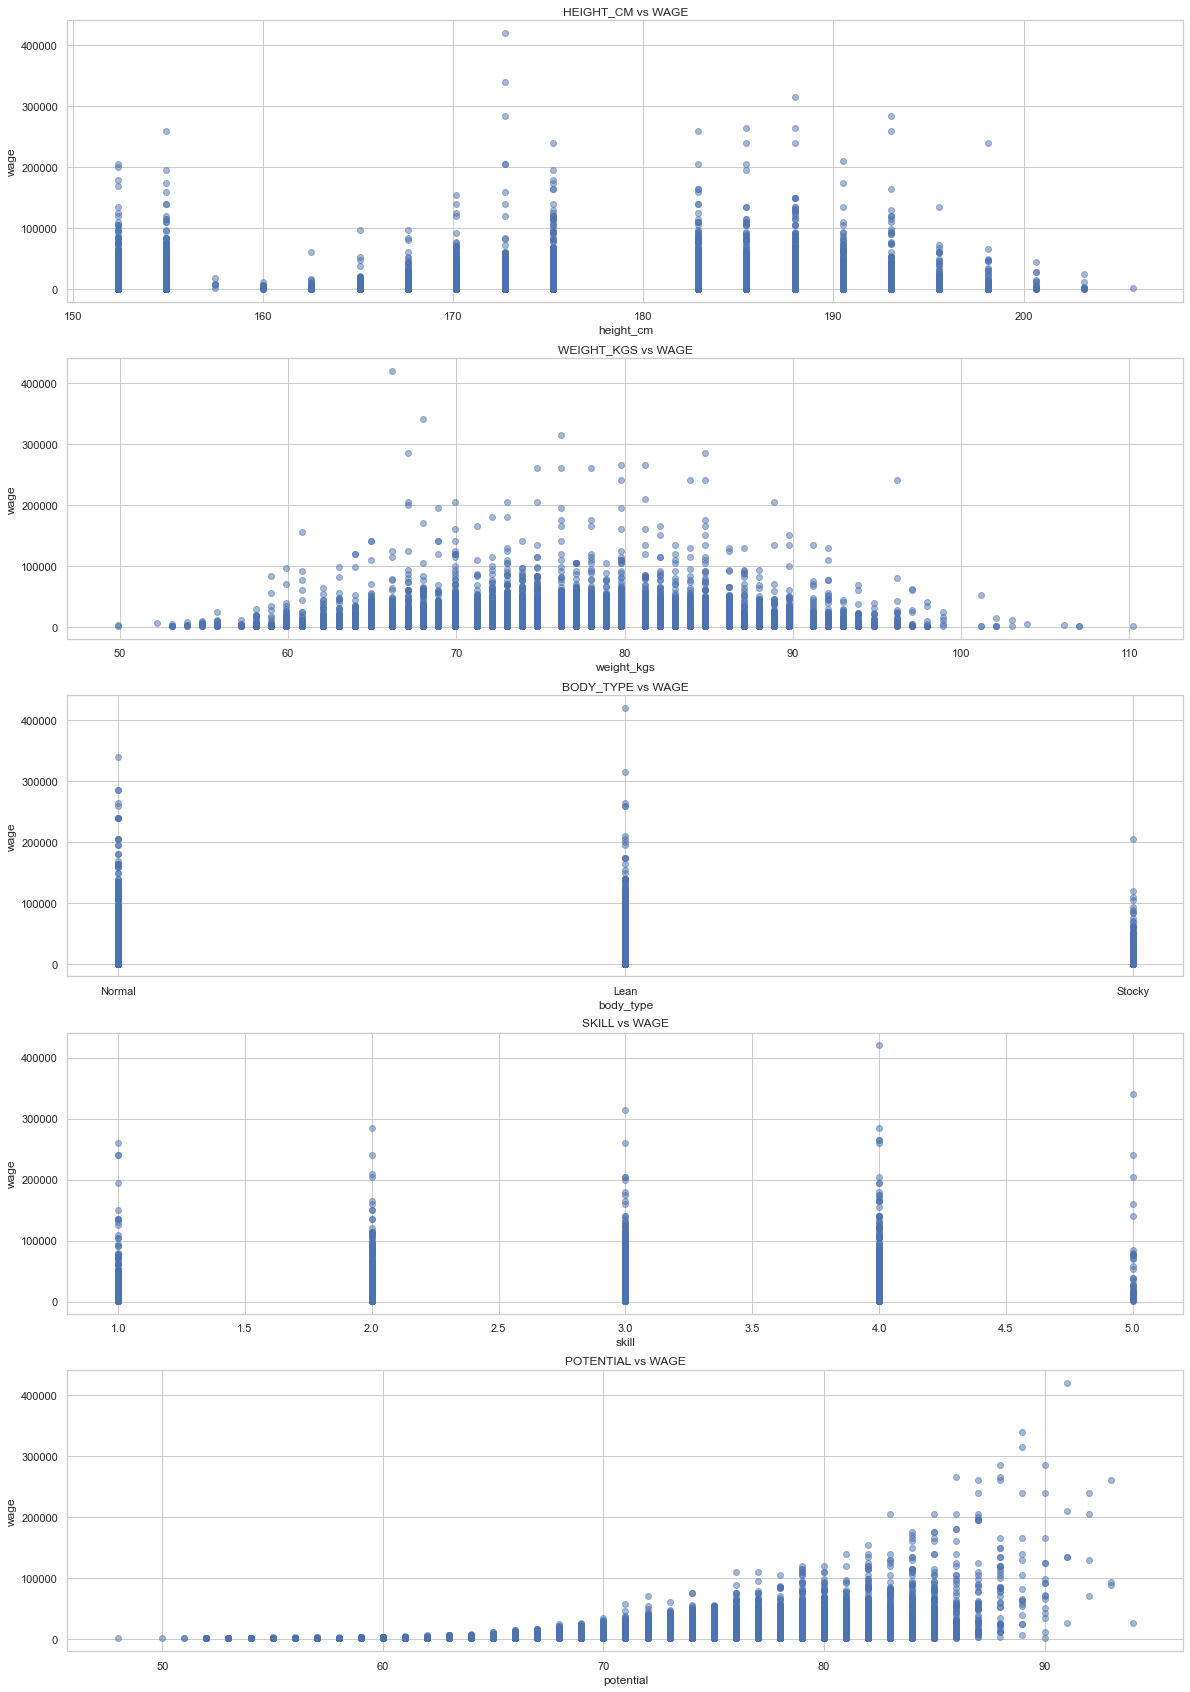

<Figure size 432x288 with 0 Axes>

In [107]:
fig = plt.figure()
plt.figure(figsize=(20,30))
plt.subplot(5, 1, 1)
plt.scatter(df['height_cm'], df['wage_euro'], alpha=0.5)
plt.title('HEIGHT_CM vs WAGE')
plt.xlabel('height_cm')
plt.ylabel('wage')
plt.subplot(5, 1, 2)
plt.scatter(df['weight_kgs'], df['wage_euro'], alpha=0.5)
plt.title('WEIGHT_KGS vs WAGE')
plt.xlabel('weight_kgs')
plt.ylabel('wage')
plt.subplot(5, 1, 3)
plt.scatter(df['body_type'], df['wage_euro'], alpha=0.5)
plt.title('BODY_TYPE vs WAGE')
plt.xlabel('body_type')
plt.ylabel('wage')
plt.subplot(5, 1, 4)
plt.scatter(df['skill'], df['wage_euro'], alpha=0.5)
plt.title('SKILL vs WAGE')
plt.xlabel('skill')
plt.ylabel('wage')
plt.subplot(5, 1, 5)
plt.scatter(df['potential'], df['wage_euro'], alpha=0.5)
plt.title('POTENTIAL vs WAGE')
plt.xlabel('potential')
plt.ylabel('wage')
plt.show()
plt.savefig('Wage_Effects.png')